# Typical control loops with sensors and actuators

We have seen in the previous notebook how to do simple simulation and record the state of the joints of the robot (position and velocity). We discuss here how we can make the robot move by sending motor commands.

Every robot comes with a set of actuators that need to be controlled. Typically, a set of "low-level" controllers are available such that one can send a desired motor torque or a desired joint position and the robot controller will transform this into a current to modulate the rotation of an electric motor or the opening/closing of a pneumatic or hydraulic valve. This in turn will create a movement of the robot.

In our class, we will assume that we can send a desired joint torque and that it will be achieved on the robot. PyBullet enables the same level of "abstraction" which is sufficient for most robot applications.

We will now see how we can send desired motor torques to the robot. We have wrapped all the functionality needed from PyBullet into the class NYUFingerSimulator located in the file [nyu_finger_simulator.py](./nyu_finger_simulator.py).

In [2]:
#setup nice plotting
%matplotlib widget

# we import useful libraries
import time
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

# we import the helper class / what we important depends on whether we use the real robot or not
use_real_robot_computer = False
use_real_robot = False

if use_real_robot_computer:
    from nyu_finger import NYUFingerReal
    from nyu_finger_sim.nyu_finger_simulator import NYUFingerSimulator
else:
    from nyu_finger_simulator import NYUFingerSimulator


pybullet build time: Jan 31 2022 13:10:48


In [4]:
# we can now create a robot simulation
if use_real_robot:
    robot = NYUFingerReal()
    robot.initialize('enp5s0f1')
else:
    robot = NYUFingerSimulator()
    # we reset the simulation to the initial position we want to start from
    robot.reset_state(np.array([0.0,0.0,0.0]))

2022-01-31 13:35:28.788 Python[51033:2481208] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/5r/vbxm70j97n13xz8b5hp6stxw0000gn/T/org.python.python.savedState


In [5]:
# we can now send a desired motor command and simulate the behavior of the robot
# we send 0.1Nm on the first joint
# we also record the measured state of the robot

# we simulate for 5 seconds
run_time = 5.
num_steps = int(run_time/robot.dt)

measured_positions = np.zeros([num_steps,3])
measured_velocities = np.zeros_like(measured_positions)
desired_torques = np.zeros_like(measured_positions)
time = np.zeros_like(measured_positions)

## this is our main control loop ##
for i in range(num_steps):
    # get the current time
    time[i] = robot.dt * i
    
    # we get the position and velocities of the joints
    q, dq = robot.get_state()
    measured_positions[i,:] = q
    measured_velocities[i,:] = dq
    
    # we compute the desired torques
    # here we send a constant torque to each joint
    joint_torques = np.array([0.1,0.,0.])
    desired_torques[i,:] = joint_torques
    
    # we send them to the robot and do one simulation step
    robot.send_joint_torque(joint_torques)
    robot.step()    

Text(0.5, 1.0, 'joint velocities')

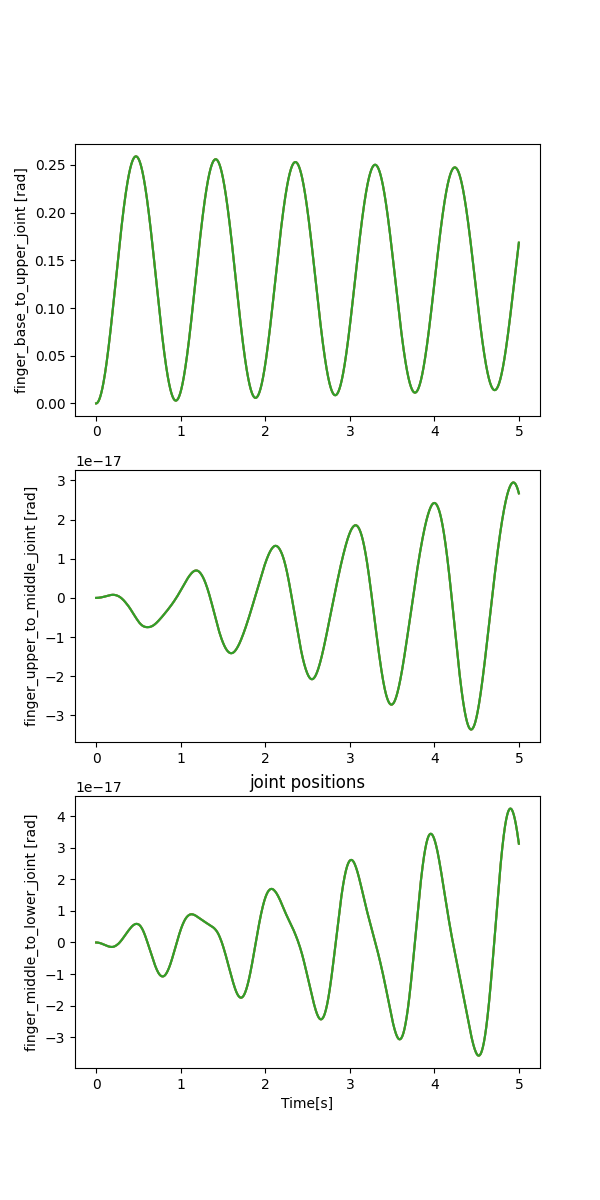

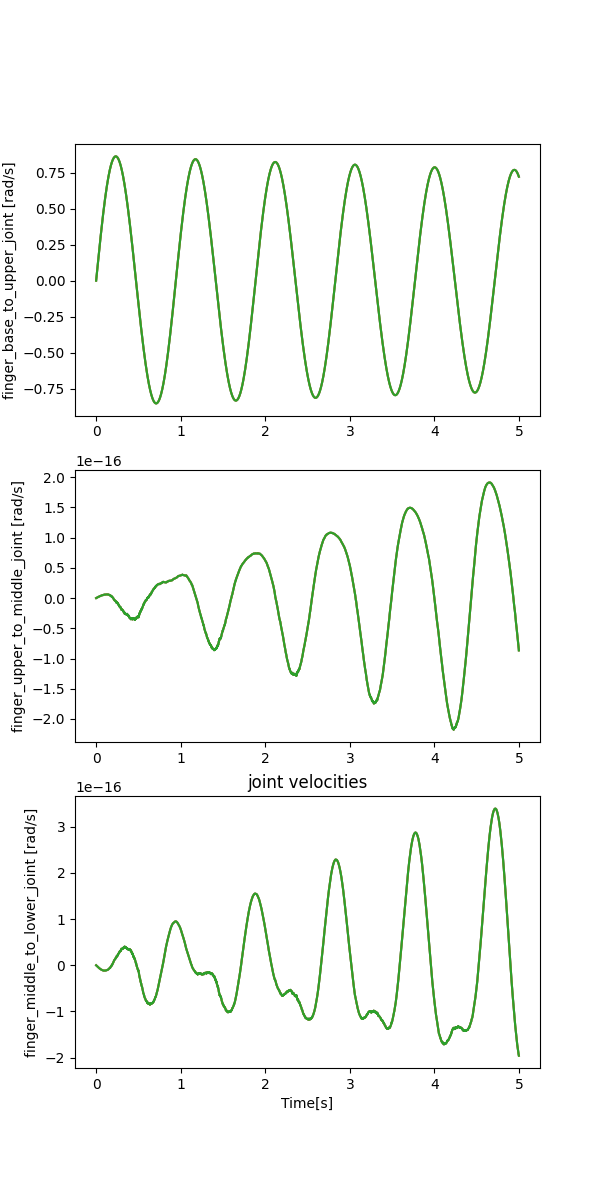

In [6]:
# we plot the measured position and velocities of all the joints
plt.figure(figsize=[6, 12])
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(time, measured_positions[:,i])
    plt.ylabel(robot.joint_names[i] + ' [rad]')
plt.xlabel('Time[s]')
plt.title('joint positions')

plt.figure(figsize=[6, 12])
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(time, measured_velocities[:,i])
    plt.ylabel(robot.joint_names[i] + ' [rad/s]')
plt.xlabel('Time[s]')
plt.title('joint velocities')

## A typical control loop

Above we have seen a typical control loop:
1. First read the sensors
2. Compute the desired torque commands
3. Send the commands to the motors
4. Repeat periodically (typically at a rate of ~100Hz to 1KHz)

The example was doing "open loop" control because we did not use the sensor measurement to compute the desired commands. "Closed loop" control will make use of the sensors to compute the control commands.

## Questions:
(submit a pdf with detailed answers to these questions, including the plots through Brightspace)
1. What is the control rate that we used in this example in Hz?

2. Describe the behavior of the robot when 0.1 Nm is applied to the 1st joint and 0 Nm applied to the others. What is the physical explanation for this behavior (in words)?

3. What is the maximum constant torque that can be applied on the first joint before it hits the joint limit? (start from the same initial pose for the robot)

4. Apply a periodic torque of $0.05\sin(2\pi t)$ Nm on the first joint. What do you observe? Join a plot of the position and velocity for each joint. (start from the same initial pose for the robot)